<a href="https://colab.research.google.com/github/Monirekhonsari/Quantium-Virtual-Internship--Retail-Strategy-and-Analytics/blob/main/Retail_Strategy_and_Analytics_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.mosaicplot import mosaic
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploded = files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour (1).csv
Saving QVI_transaction_data.xlsx to QVI_transaction_data (1).xlsx


In [3]:
df1 = pd.read_csv("QVI_purchase_behaviour.csv")
df2 = pd.read_excel("QVI_transaction_data.xlsx")

In [4]:
df1['LYLTY_CARD_NBR'] = df1['LYLTY_CARD_NBR'].astype(str)
df2['LYLTY_CARD_NBR'] = df2['LYLTY_CARD_NBR'].astype(str)

In [5]:
df = df1.merge(df2, on='LYLTY_CARD_NBR', how='left')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  object 
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 20.2+ MB


In [7]:
df.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836,264836,264836,264836.000000,264836.00000,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,72637,7,3,NaN,NaN,NaN,NaN,114,NaN,NaN
top,172032,OLDER SINGLES/COUPLES,Mainstream,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,18,54479,101988,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,NaN,NaN,NaN,43464.036260,135.08011,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,NaN,NaN,NaN,105.389282,76.78418,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,NaN,NaN,NaN,43282.000000,1.00000,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,NaN,NaN,NaN,43373.000000,70.00000,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,NaN,NaN,NaN,43464.000000,130.00000,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,NaN,NaN,NaN,43555.000000,203.00000,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [8]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [9]:
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

In [10]:
df['PROD_NAME'].value_counts()

,count
PROD_NAME,
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419


In [11]:
unique_product = df['PROD_NAME'].unique()

words = []
for name in unique_product :
  words.extend(name.split(" "))


product_words  = pd.DataFrame(words, columns=['Words'])

word_counts = product_words ['Words'].value_counts()
print(word_counts)

Words
          234
175g       26
Chips      21
150g       19
&          17
         ... 
N           1
Hot         1
Spicy       1
Slt         1
Vingar      1
Name: count, Length: 221, dtype: int64


In [12]:
product_words = product_words[~product_words['Words'].str.contains(r'\d', na=False)]

In [13]:
product_words = product_words[product_words['Words'].str.contains(r'[A-Za-z]', na=False)]

In [14]:
product_words['Words'].value_counts()

,count
Words,
Chips,21
Smiths,16
Crinkle,14
Cut,14
Kettle,13
...,...
N,1
Hot,1
Spicy,1


In [15]:
df.describe()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215360,135.08011,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,7.813303e+04,32.826638,0.643654,3.083226


In [16]:
df[df['TOT_SALES'] == df['TOT_SALES'].max()]


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
df[df['PROD_QTY'] == 200]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [18]:
df = df[df['PROD_QTY'] != 200]

In [19]:
df.describe()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292937984,135.079423,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,7.813292e+04,32.826444,0.343436,2.527241


In [20]:
df.groupby('DATE').size().reset_index(name='N')

,DATE,N
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


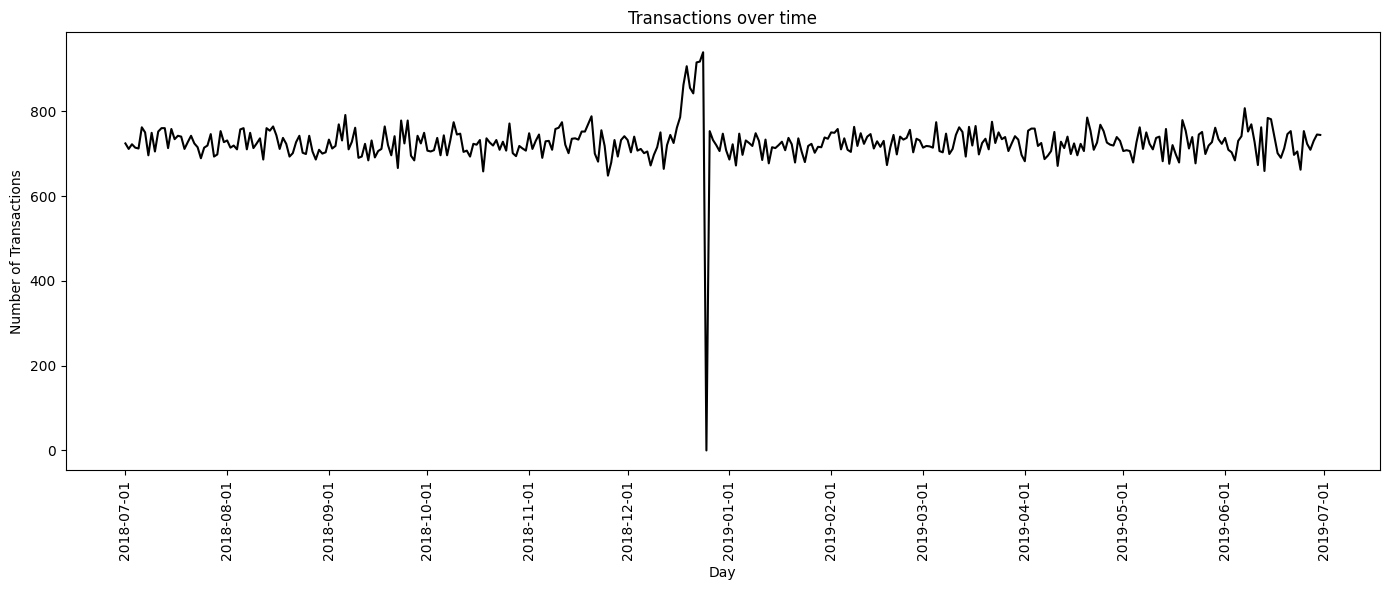

In [21]:
import matplotlib.dates as mdates

all_dates = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

all_dates = pd.DataFrame({'DATE': all_dates})

pre_day = df.groupby('DATE').size().reset_index(name='N')

day = all_dates.merge(pre_day, on='DATE', how='left')

day['N'] = day['N'].fillna(0).astype(int)

plt.figure(figsize=(14,6))
plt.plot(day['DATE'], day['N'],color='black')

plt.title("Transactions over time")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


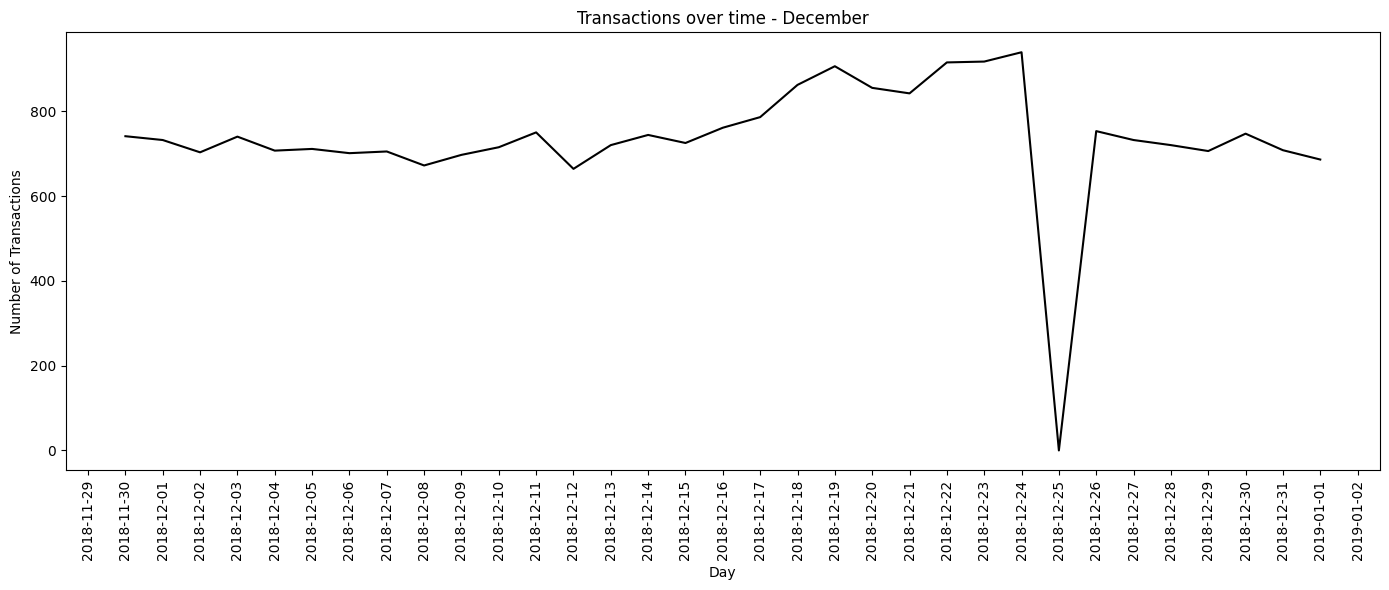

In [22]:
dec_day = day[(day['DATE'] >= '2018-11-30') & (day['DATE'] <= '2019-01-01')]

plt.figure(figsize=(14, 6))
plt.plot(dec_day['DATE'], dec_day['N'], color='black')

plt.title("Transactions over time - December")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [23]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype('Int64')

In [24]:
pack_count = df.groupby('PACK_SIZE').size().reset_index(name='N').sort_values('N', ascending=False)

pack_count

,PACK_SIZE,N
10,175,66390
6,150,43131
4,134,25102
2,110,22387
9,170,19983
8,165,15297
18,300,15166
19,330,12540
20,380,6416
17,270,6285


(array([  1507.,   3008.,  22387.,   1454.,  28359.,  46101., 101670.,
          4463.,   4473.,   7836.,      0.,   3169.,   6285.,      0.,
         15166.,      0.,  12540.,      0.,      0.,   6416.]),
 array([ 70. ,  85.5, 101. , 116.5, 132. , 147.5, 163. , 178.5, 194. ,
        209.5, 225. , 240.5, 256. , 271.5, 287. , 302.5, 318. , 333.5,
        349. , 364.5, 380. ]),
 <BarContainer object of 20 artists>)

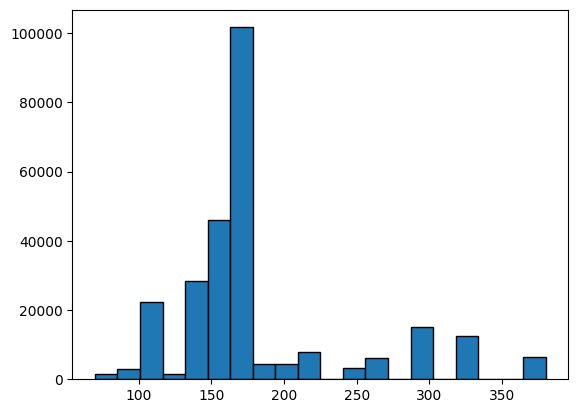

In [25]:
plt.hist(df['PACK_SIZE'], bins=20, edgecolor='black')

In [26]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [27]:
df['BRAND'] = df['PROD_NAME'].str.split().str[0].str.upper()

In [28]:
brand_counts = df.groupby('BRAND').size().reset_index(name='N').sort_values('N', ascending=False)
brand_counts

,BRAND,N
12,KETTLE,41288
20,SMITHS,28860
16,PRINGLES,25102
6,DORITOS,24962
23,THINS,14075
18,RRD,11894
10,INFUZIONS,11057
28,WW,10320
4,COBS,9693
24,TOSTITOS,9471


In [29]:
brand_fix_map = {"RED" : " RRD",
               "SNBTS" : "SUNBITES",
               "INFZNS" : "INFUZION",
               "WW" : "WOOLWORTHS",
               "SMITH" : "SMITHS",
               "NCC" : "NATURAL",
               "DORITO" : "DORITOS",
               "GRAIN" : "GRNWVES"}

df['BRAND'] = df['BRAND'].replace(brand_fix_map)
df['BRAND']

,BRAND
0,NATURAL
1,RRD
2,GRNWVES
3,NATURAL
4,WOOLWORTHS
...,...
264831,GRNWVES
264832,KETTLE
264833,TYRRELLS
264834,OLD


In [30]:
brand_counts = df.groupby('BRAND').size().reset_index(name='N').sort_values('N', ascending=False)
brand_counts

,BRAND,N
11,KETTLE,41288
16,SMITHS,31823
6,DORITOS,28145
14,PRINGLES,25102
22,WOOLWORTHS,14757
18,THINS,14075
15,RRD,11894
10,INFUZIONS,11057
5,COBS,9693
19,TOSTITOS,9471


In [31]:
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [32]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [33]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [34]:
len(customer_data)

72637

In [35]:
customer_data.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [36]:
customer_data['PREMIUM_CUSTOMER'].max()

'Premium'

In [37]:
lifestage_counts = (
    customer_data
    .groupby('LIFESTAGE')
    .size()
    .reset_index(name='N')
    .sort_values('N', ascending=False)
)

print(lifestage_counts)

                LIFESTAGE      N
4                RETIREES  14805
3   OLDER SINGLES/COUPLES  14609
6   YOUNG SINGLES/COUPLES  14441
2          OLDER FAMILIES   9780
5          YOUNG FAMILIES   9178
0  MIDAGE SINGLES/COUPLES   7275
1            NEW FAMILIES   2549


In [38]:
premium_counts = (
    customer_data
    .groupby('PREMIUM_CUSTOMER')
    .size()
    .reset_index(name='N')
    .sort_values('N', ascending=False)
)

print(premium_counts)

  PREMIUM_CUSTOMER      N
1       Mainstream  29245
0           Budget  24470
2          Premium  18922


In [39]:
df['LYLTY_CARD_NBR'] = df['LYLTY_CARD_NBR'].astype('int64')


In [40]:
data = df.merge(customer_data, on='LYLTY_CARD_NBR', how='left')

In [44]:
data = data.drop(columns=['LIFESTAGE_x', 'PREMIUM_CUSTOMER_x'])

data = data.rename(columns={
    'LIFESTAGE_y': 'LIFESTAGE',
    'PREMIUM_CUSTOMER_y': 'PREMIUM_CUSTOMER'
})

print(data.columns)


Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')


In [45]:
sales = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .reset_index(name='SALES')
)


In [46]:
mosaic_dict = {
    (row['LIFESTAGE'], row['PREMIUM_CUSTOMER']): row['SALES']
    for _, row in sales.iterrows()
}


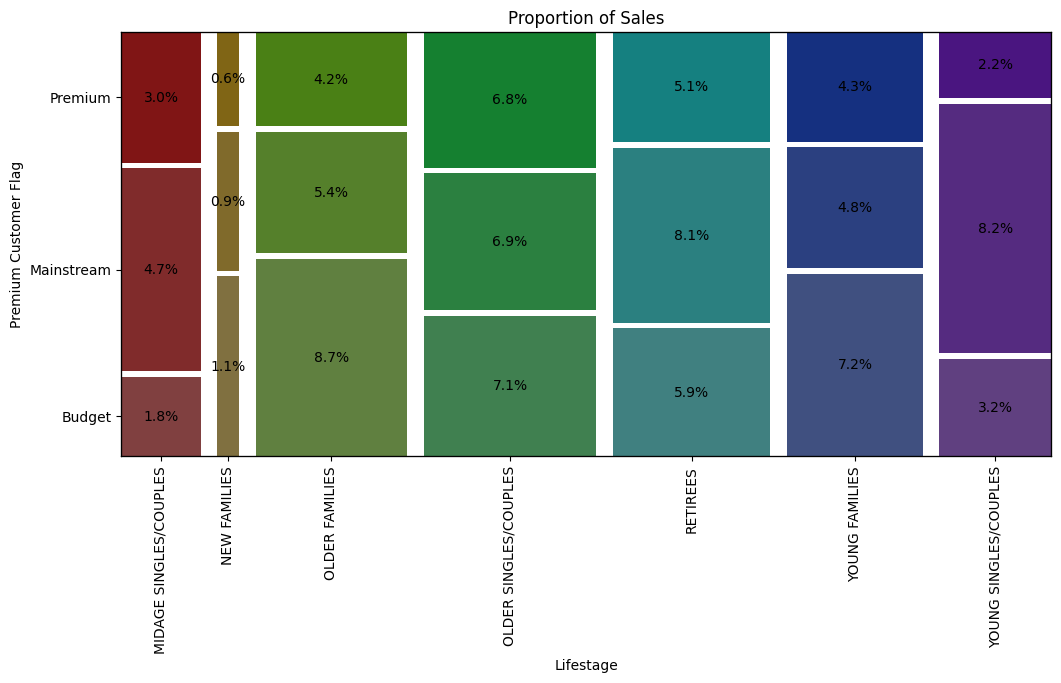

In [99]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

def no_label(key):
    return ''

fig, ax = plt.subplots(figsize=(12, 8))


fig, rects = mosaic(
    mosaic_dict,
    gap=0.02,
    labelizer=no_label,
    label_rotation=[90, 0],
    ax=ax
)

total_sales = sum(mosaic_dict.values())
for key, rect in rects.items():
    x, y, w, h = rect
    percent = mosaic_dict[key] / total_sales * 100
    ax.text(
        x + w / 2, y + h / 2,
        f"{percent:.1f}%",
        ha='center', va='center',
        fontsize=10
    )

ax.set_title("Proportion of Sales")
ax.set_xlabel("Lifestage")
ax.set_ylabel("Premium Customer Flag")


fig.subplots_adjust(bottom=0.35)

plt.show()



In [58]:
avg_units = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(
        TOTAL_QTY=('PROD_QTY', 'sum'),
        N_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique')
    )
)

avg_units['AVG'] = avg_units['TOTAL_QTY'] / avg_units['N_CUSTOMERS']


avg_units = (
    avg_units
    .reset_index()
    .sort_values('AVG', ascending=False)
)

print(avg_units.head())


         LIFESTAGE PREMIUM_CUSTOMER  TOTAL_QTY  N_CUSTOMERS       AVG
7   OLDER FAMILIES       Mainstream      27756         2831  9.804309
6   OLDER FAMILIES           Budget      45065         4675  9.639572
8   OLDER FAMILIES          Premium      21771         2273  9.578091
15  YOUNG FAMILIES           Budget      37111         4017  9.238486
17  YOUNG FAMILIES          Premium      22406         2433  9.209207


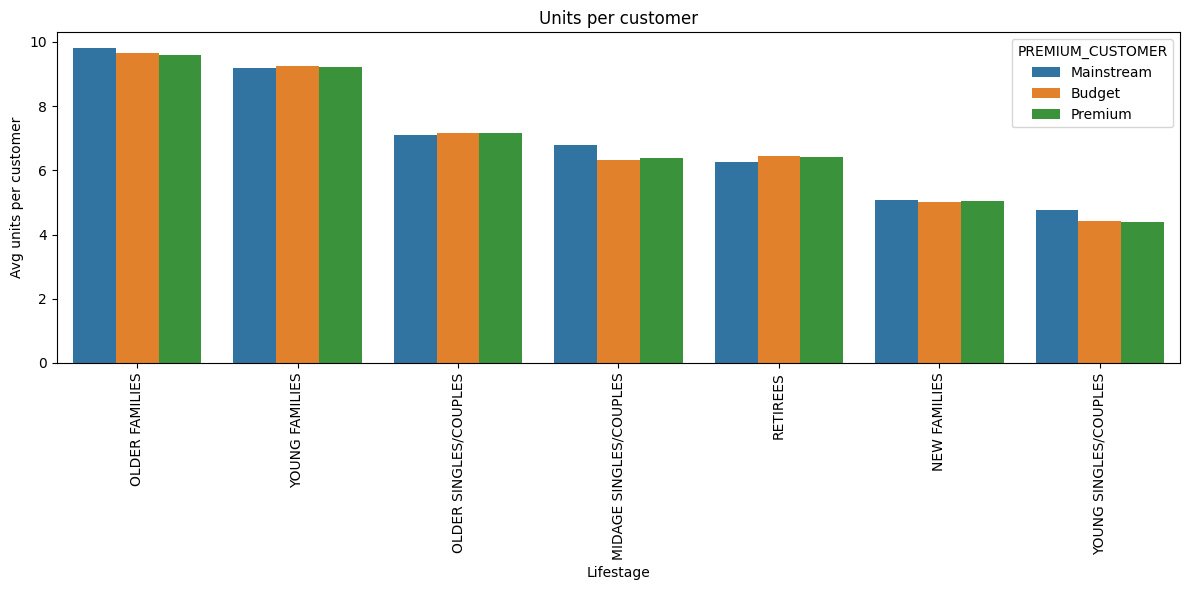

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_units,
    x='LIFESTAGE',
    y='AVG',
    hue='PREMIUM_CUSTOMER',
)

plt.title("Units per customer")
plt.xlabel("Lifestage")
plt.ylabel("Avg units per customer")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [71]:
import pandas as pd

avg_price = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(
        TOTAL_SALES=('TOT_SALES', 'sum'),
        TOTAL_QTY=('PROD_QTY', 'sum')
    )
)


avg_price['AVG'] = avg_price['TOTAL_SALES'] / avg_price['TOTAL_QTY']


avg_price = (
    avg_price
    .reset_index()
    .sort_values('AVG', ascending=False)
)

print(avg_price.head())


                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SALES  TOTAL_QTY       AVG
19   YOUNG SINGLES/COUPLES       Mainstream    157621.60      38632  4.080079
1   MIDAGE SINGLES/COUPLES       Mainstream     90803.85      22699  4.000346
4             NEW FAMILIES       Mainstream     17013.90       4319  3.939315
3             NEW FAMILIES           Budget     21928.45       5571  3.936178
12                RETIREES           Budget    113147.80      28764  3.933660


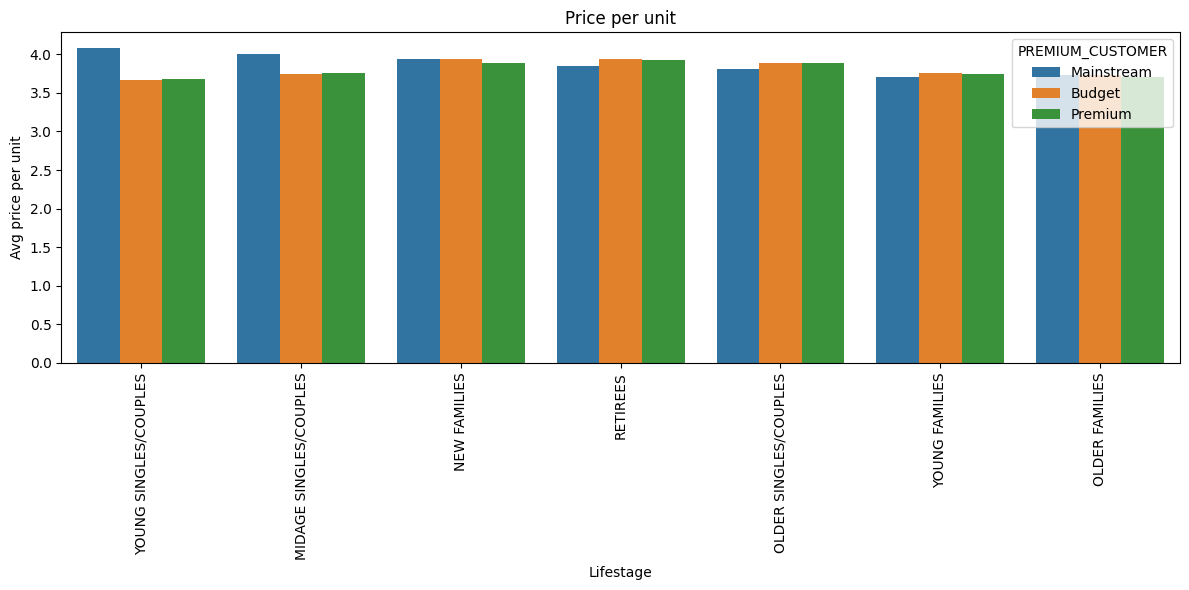

In [70]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_price,
    x='LIFESTAGE',
    y='AVG',
    hue='PREMIUM_CUSTOMER' )

plt.title("Price per unit")
plt.xlabel("Lifestage")
plt.ylabel("Avg price per unit")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [67]:
import numpy as np
from scipy.stats import ttest_ind

data['price'] = data['TOT_SALES'] / data['PROD_QTY']


mask_ls = data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])

g1 = data[mask_ls & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['price'].dropna()


g2 = data[mask_ls & (data['PREMIUM_CUSTOMER'] != 'Mainstream')]['price'].dropna()


stat, p_two_sided = ttest_ind(g1, g2, equal_var=False)

if stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - p_two_sided / 2

print("t-statistic:", stat)
print("two-sided p-value:", p_two_sided)
print("one-sided p-value (mean Mainstream > others):", p_one_sided)


t-statistic: 40.60989476220127
two-sided p-value: 0.0
one-sided p-value (mean Mainstream > others): 0.0


In [68]:
segment1 = data[
    (data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") &
    (data['PREMIUM_CUSTOMER'] == "Mainstream")
]


other = data[
    ~(
        (data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") &
        (data['PREMIUM_CUSTOMER'] == "Mainstream")
    )
]


quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()


quantity_segment1_by_brand = (
    segment1
    .groupby('BRAND')['PROD_QTY']
    .sum()
    .reset_index()
)

quantity_segment1_by_brand['targetSegment'] = (
    quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1
)

quantity_segment1_by_brand = quantity_segment1_by_brand[['BRAND', 'targetSegment']]


quantity_other_by_brand = (
    other
    .groupby('BRAND')['PROD_QTY']
    .sum()
    .reset_index()
)

quantity_other_by_brand['other'] = (
    quantity_other_by_brand['PROD_QTY'] / quantity_other
)

quantity_other_by_brand = quantity_other_by_brand[['BRAND', 'other']]


brand_proportions = pd.merge(
    quantity_segment1_by_brand,
    quantity_other_by_brand,
    on='BRAND',
    how='inner'
)

brand_proportions['affinityToBrand'] = (
    brand_proportions['targetSegment'] / brand_proportions['other']
)

brand_proportions = brand_proportions.sort_values(
    'affinityToBrand',
    ascending=False
)

brand_proportions


,BRAND,targetSegment,other,affinityToBrand
21,TYRRELLS,0.029587,0.023933,1.236235
20,TWISTIES,0.043306,0.035283,1.227401
11,KETTLE,0.185649,0.154216,1.203823
19,TOSTITOS,0.042581,0.035377,1.203638
13,OLD,0.041598,0.034753,1.196958
9,INFUZION,0.014004,0.011712,1.195663
14,PRINGLES,0.111980,0.093743,1.194536
6,DORITOS,0.122877,0.105277,1.167176
5,COBS,0.041856,0.036375,1.150700
10,INFUZIONS,0.046645,0.041445,1.125485


In [73]:
data.loc[data['PACK_SIZE'] == 270, 'PROD_NAME'].unique()


array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

In [75]:
data.loc[data['PACK_SIZE'] == 270, 'PROD_NAME'].nunique()


2